In [6]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
id = '1-tgbqle-tpsLrAQzU-86TMN4ffbmaUwy'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('dataset.csv')

In [8]:
import pandas as pd

In [52]:
df = pd.read_csv("dataset.csv", encoding='ISO-8859-1')

In [53]:
df.drop(columns="NO_QUERY", inplace=True)

In [54]:
df.columns = ["target", "id", "date", "name", "text"]

In [ ]:
print(df.info())
print(df.describe())
print(df.head())

In [68]:
import re
df['month'] = df['date'].apply(lambda x: x.split(' ')[1])
df['day'] = df['date'].apply(lambda x: x.split(' ')[0])

In [88]:
dias = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day'] = pd.Categorical(df['day'], categories=dias, ordered=True)

# Contar la cantidad de tweets por día de la semana
tweets_por_dia = df['day'].value_counts().sort_index()

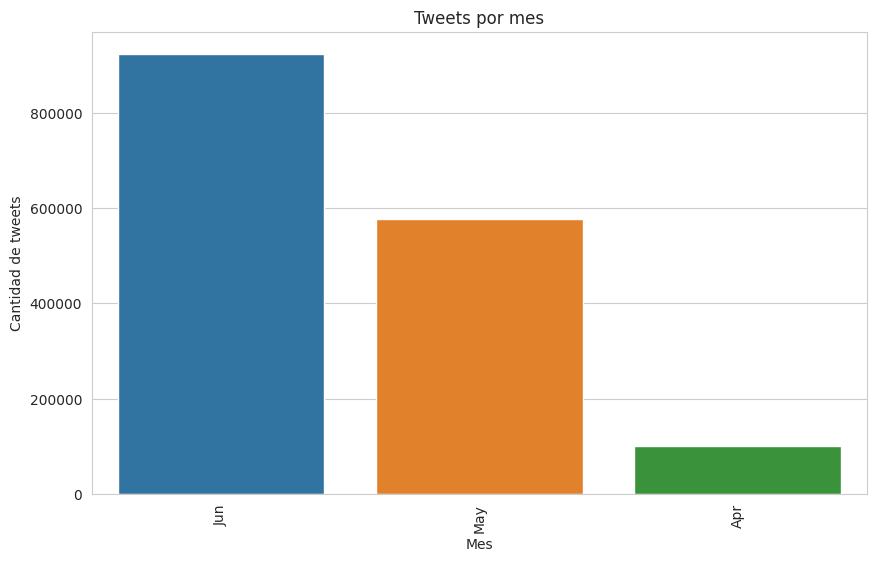

In [121]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df['month'].value_counts().index, y=df['month'].value_counts().values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y los ejes
ax.set_title('Tweets por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de tweets')

# Mostrar el gráfico
plt.show()

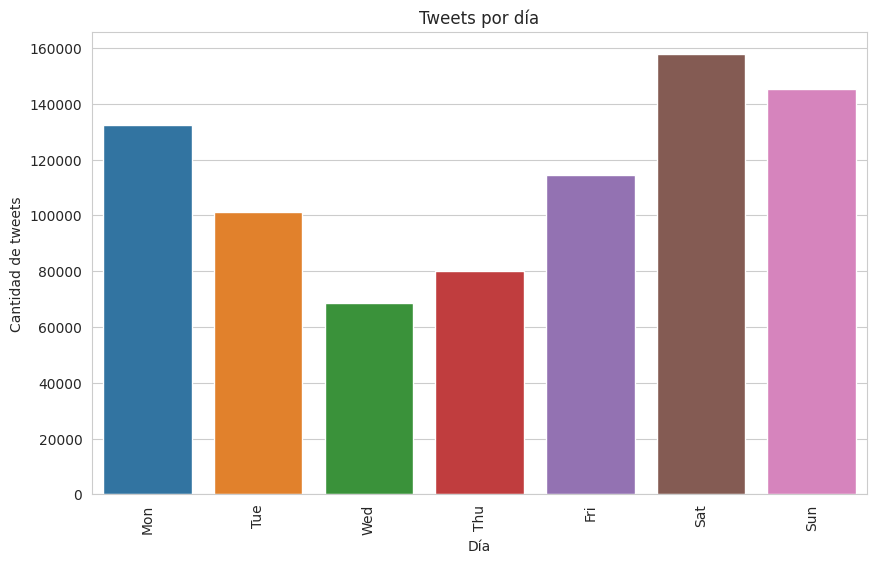

In [122]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=tweets_por_dia.index, y=tweets_por_dia.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y los ejes
ax.set_title('Tweets por día')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad de tweets')

# Mostrar el gráfico
plt.show()

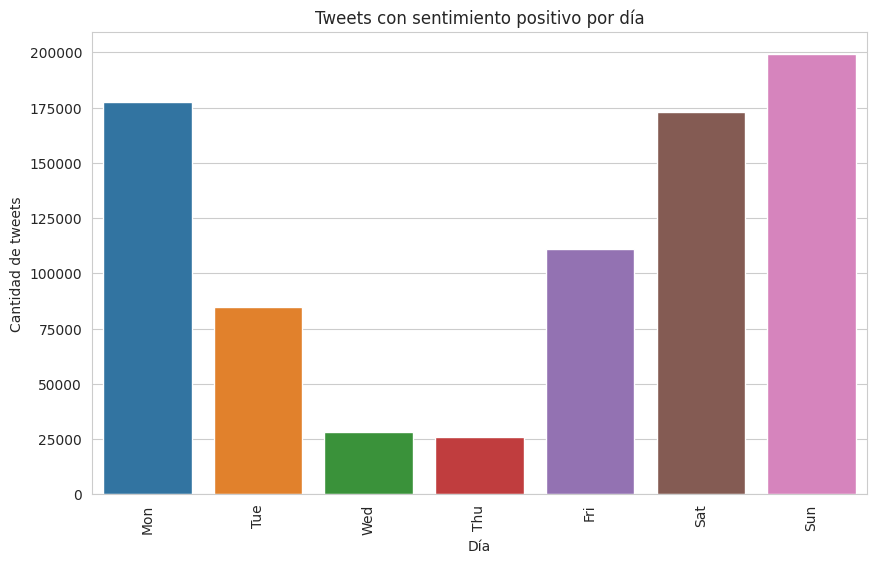

In [124]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
tweets_por_dia = df[df.target==4]['day'].value_counts().sort_index()
sns.barplot(x=tweets_por_dia.index, y=tweets_por_dia.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y los ejes
ax.set_title('Tweets con sentimiento positivo por día')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad de tweets')

# Mostrar el gráfico
plt.show()

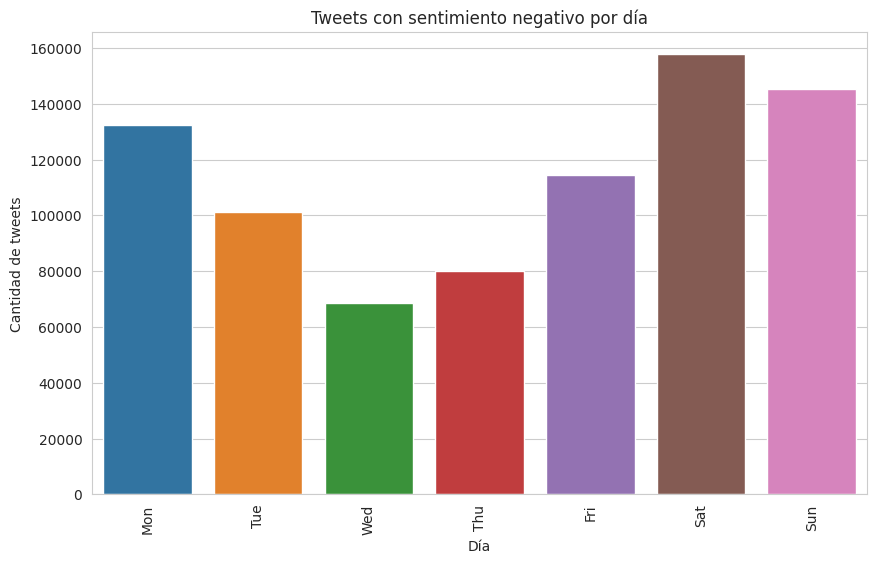

In [125]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
tweets_por_dia = df[df.target==0]['day'].value_counts().sort_index()
sns.barplot(x=tweets_por_dia.index, y=tweets_por_dia.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y los ejes
ax.set_title('Tweets con sentimiento negativo por día')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad de tweets')

# Mostrar el gráfico
plt.show()

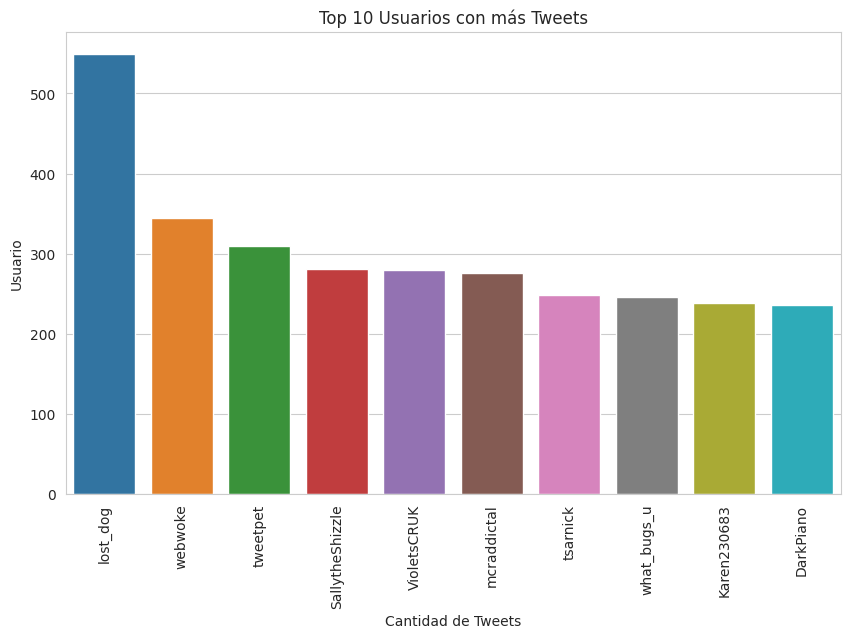

In [126]:
tweets_por_usuario = df.groupby('name')['text'].count()
t = tweets_por_usuario.sort_values(ascending=False).head(10)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=t.index, y=t.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y los ejes
ax.set_title('Top 10 Usuarios con más Tweets')
ax.set_xlabel('Cantidad de Tweets')
ax.set_ylabel('Usuario')

# Mostrar el gráfico
plt.show()

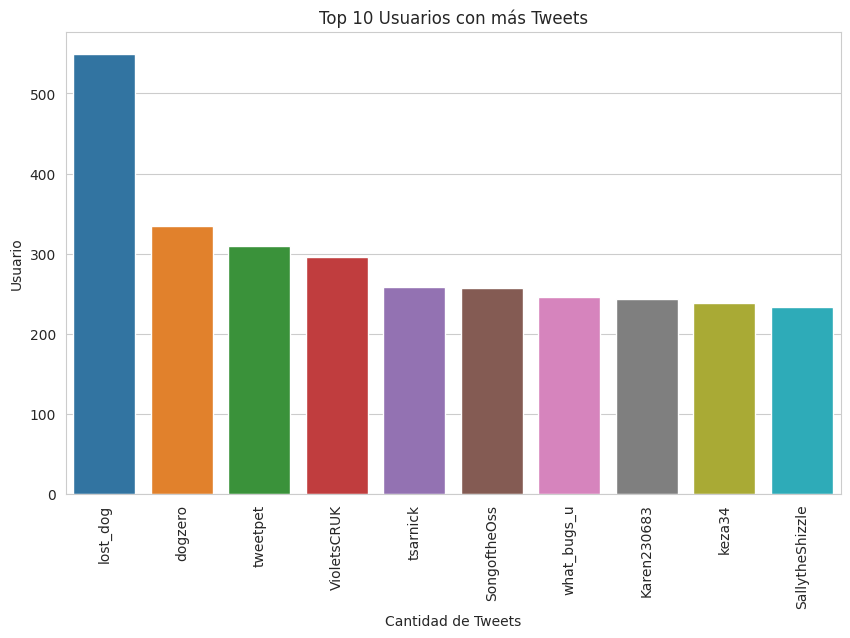

In [113]:
df['cant_menciones'] = df['text'].apply(lambda x: x.count('@'))
menciones = df.groupby('name')['cant_menciones'].sum()
t = menciones.sort_values(ascending=False).head(10)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=t.index, y=t.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y los ejes
ax.set_title('Top 10 Usuarios con más menciones en sus Tweets')
ax.set_xlabel('Cantidad de Tweets')
ax.set_ylabel('Usuario')

# Mostrar el gráfico
plt.show()

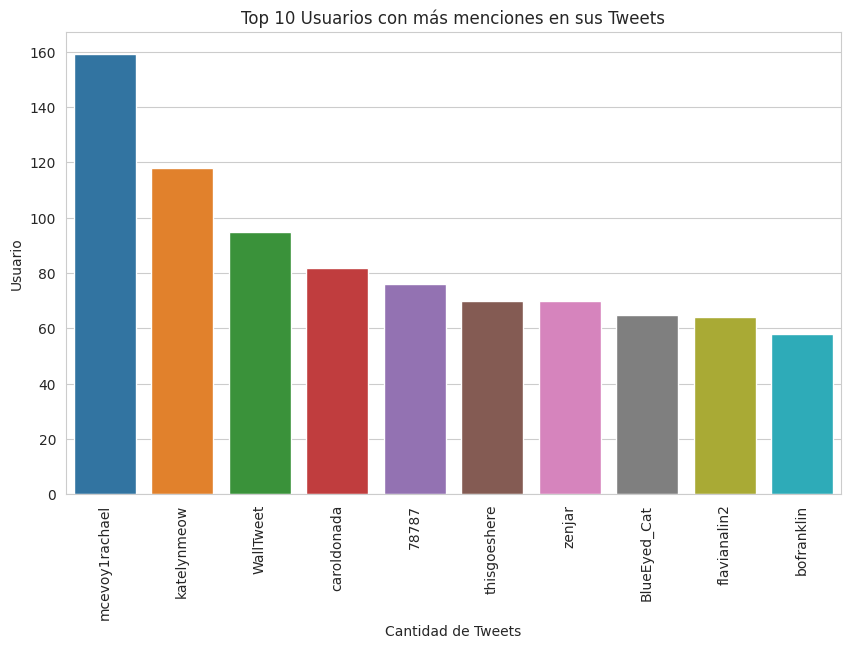

In [115]:
df['cant_hashtags'] = df['text'].apply(lambda x: x.count('#'))
menciones = df.groupby('name')['cant_hashtags'].sum()
t = menciones.sort_values(ascending=False).head(10)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=t.index, y=t.values, ax=ax)
# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y los ejes
ax.set_title('Top 10 Usuarios con más menciones en sus Tweets')
ax.set_xlabel('Cantidad de Tweets')
ax.set_ylabel('Usuario')

# Mostrar el gráfico
plt.show()

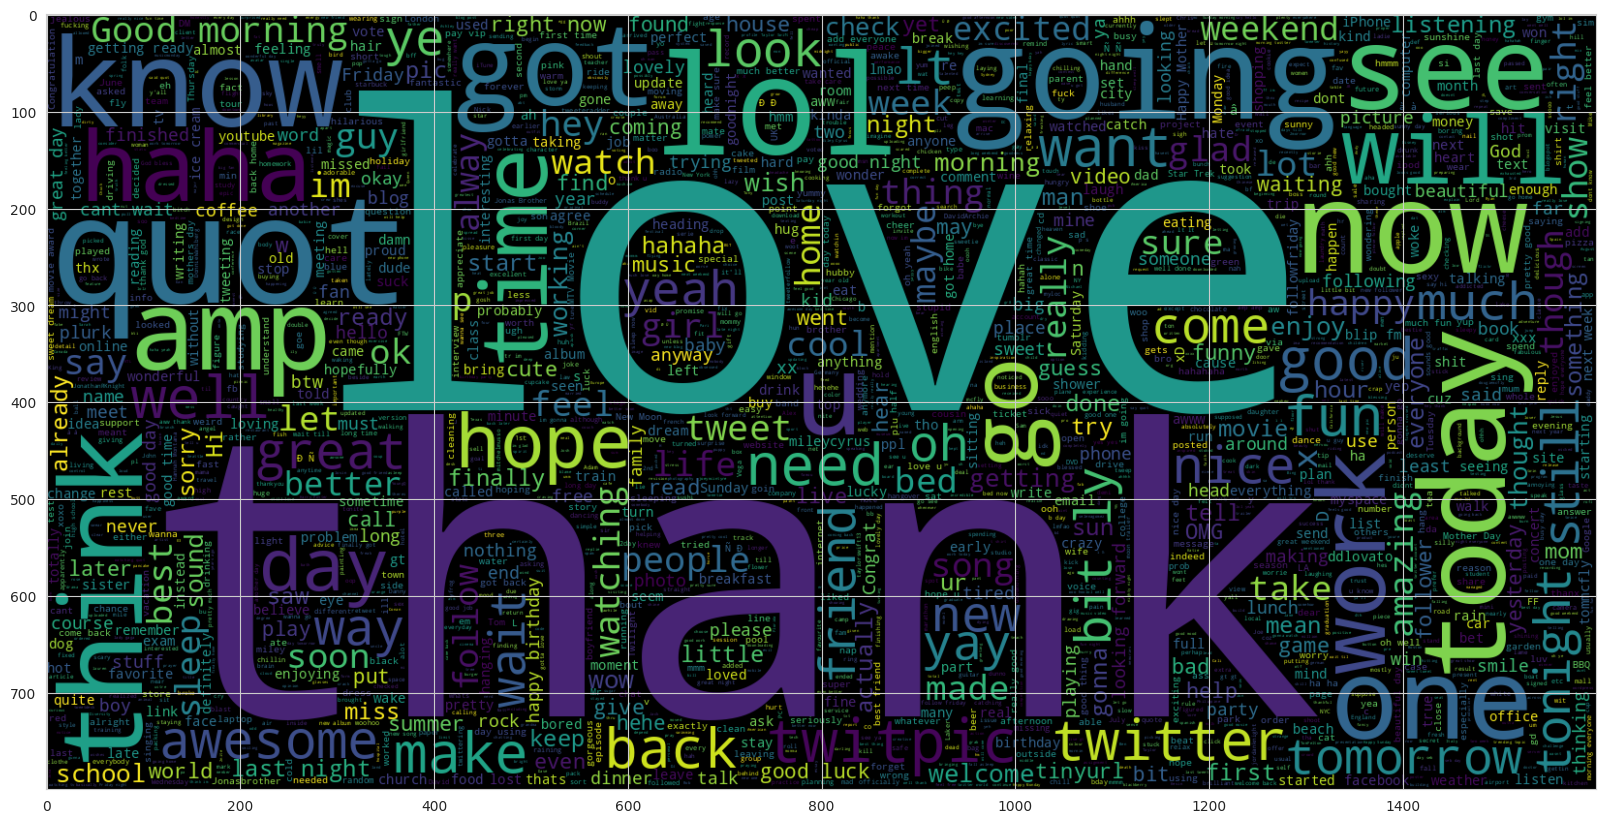

In [117]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 4].text))
plt.imshow(wc , interpolation = 'bilinear')

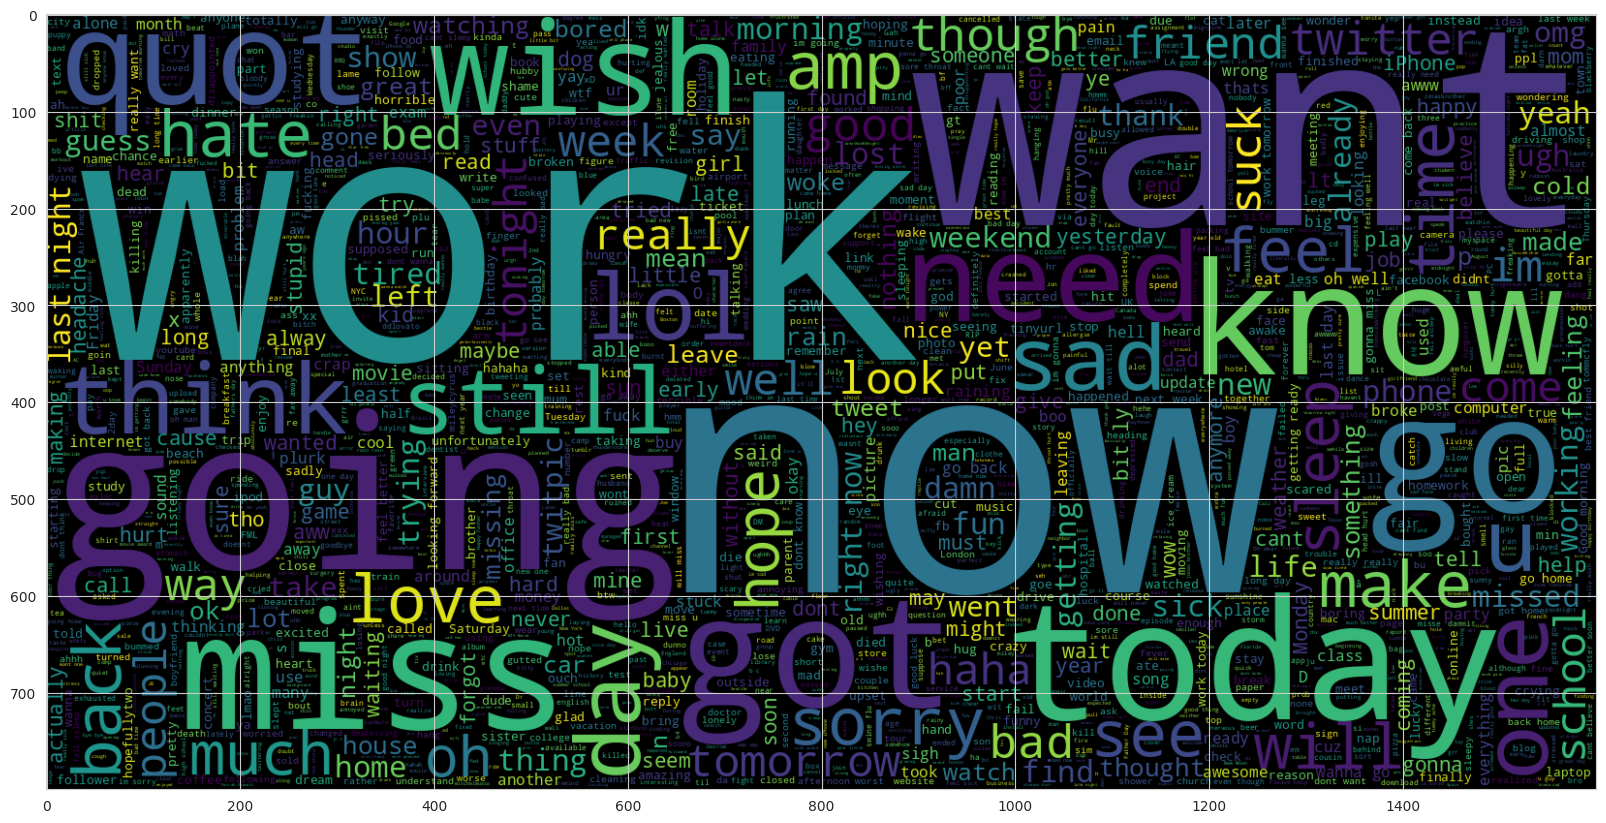

In [118]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')